In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('F:/data science/fake job postings/fake_job_postings.csv')
print(df.dtypes)
print(df.shape)
print(df.info)
print(df.describe())
print(df.columns)

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object
(17880, 18)
<bound method DataFrame.info of        job_id                                              title  \
0           1                                   Marketing Intern   
1           2          Customer Service - Cloud Video Production   
2           3            Commissioning Machinery Assistant (CMA)   
3           4                  Account Executive - Washington DC   
4           5                                Bill Review Manag

In [5]:
print(df.isna().sum())
print(df.fraudulent.value_counts())

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64
0    17014
1      866
Name: fraudulent, dtype: int64


In [6]:
print(df.title.value_counts())

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64


In [7]:
df2 = pd.DataFrame(df[['department','fraudulent']][df['fraudulent'] == 1])
df_grouped = df2.groupby('department').count()
print(df_grouped.sort_values(by='department',ascending=False))

                              fraudulent
department                              
sales                                  5
reception                              1
medical                                2
hr                                     1
customer service                       4
...                                  ...
ADMIN                                  1
ACCT                                   1
1411                                   1
1221                                   1
 \tCorporate Shared Services           1

[103 rows x 1 columns]


In [8]:
df3 = df.copy()
location_split= df3['location'].str.split(',',n=1,expand=True)
df3['country'] = location_split[0]


In [9]:
salary_split = df3['salary_range'].str.split('-',n=1,expand=True)
df3['min_salary'] = salary_split[0]

In [10]:
df3_final = df3[['department','min_salary']][df3['country'] == 'GB']
df3_final.dropna(inplace=True)
print(df3_final.head())

                         department min_salary
102                     Marketplace      15000
107                              FP      50000
113                      Operations      45000
134  Sales and Business Development      70000
153                      Production      28000


In [11]:

df4 = pd.DataFrame(df['company_profile'])
print(df4.shape)
df4.dropna(inplace=True)
print(df4.shape) ##(14572,)
df4.reset_index(drop=True,inplace=True)
df4_edit = df4

(17880, 1)
(14572, 1)


In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VINUTHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Indrajeet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stemming = PorterStemmer()
stops = set(stopwords.words("english"))
def identify_tokens(row):
    tokens = nltk.word_tokenize(row)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stops]
    stemmed_list = [stemming.stem(word) for word in meaningful_words]     
    joined_words = (','.join(stemmed_list))
    return joined_words

In [18]:
df4['processed'] = df4['company_profile'].apply(identify_tokens)
print(df4['processed'])

0        we,creat,groundbreak,cook,site,we,support,conn...
1        second,world,cloud,video,product,second,world,...
2        valor,servic,provid,workforc,solut,meet,need,c...
3        our,passion,improv,qualiti,life,geographi,hear...
4        spotsourc,solut,llc,global,human,capit,manag,c...
                               ...                        
14567    flite,deliv,ad,innov,scale,world,top,publish,b...
14568    vend,look,awesom,new,talent,come,join,us,you,w...
14569    weblinc,platform,servic,provid,fastest,grow,on...
14570    we,provid,full,time,perman,posit,mani,medium,l...
14571    vend,look,awesom,new,talent,come,join,us,you,w...
Name: processed, Length: 14572, dtype: object


In [19]:
txt = df4['processed'].str.lower().str.replace(r',', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(3),
                    columns=['Word', 'Frequency'])

In [20]:
print(rslt)
from collections import Counter
from itertools import chain
count = Counter(chain.from_iterable(df4['processed']))
print(count.most_common(3))

      Word  Frequency
0       we      16408
1  compani      11097
2     work      10484
[(',', 983815), ('e', 592498), ('i', 443064)]


fraudulent                    0  1
department                        
                              6  0
 \tCorporate Shared Services  0  1
 Lower Level Management       1  0
 Marketing                    1  0
 Moni Technologies            1  0
...                          .. ..
warehouse                     3  0
web development               1  0
Área Comercial                1  0
ΕΜΠΟΡΙΚΟ                      1  0
ΠΛΗΡΟΦΟΡΙΚΗ                   1  0

[1337 rows x 2 columns]


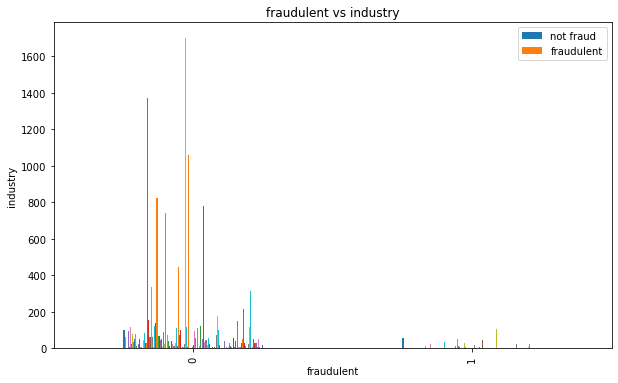

In [21]:
print(pd.crosstab(df.department,df.fraudulent))
pd.crosstab(df.fraudulent,df.industry).plot(kind='bar',figsize=(10,6))
plt.title('fraudulent vs industry')
plt.xlabel('fraudulent')
plt.ylabel('industry')
plt.legend(['not fraud','fraudulent'])
plt.show()

fraudulent           0    1
employment_type            
Contract          1480   44
Full-time        11130  490
Other              212   15
Part-time          723   74
Temporary          239    2


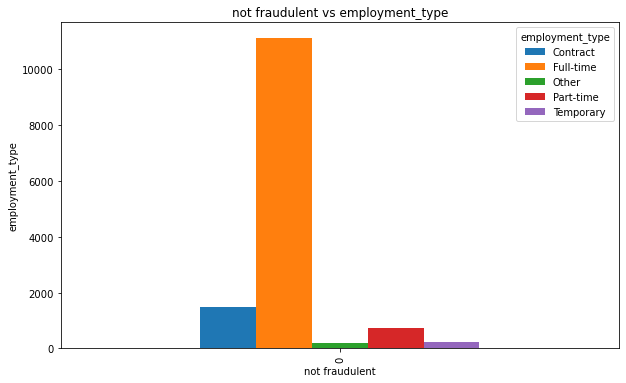

In [22]:
print(pd.crosstab(df.employment_type,df.fraudulent))
pd.crosstab(df.fraudulent[df.fraudulent == 0],df.employment_type).plot(kind='bar',figsize=(10,6))
plt.title('not fraudulent vs employment_type')
plt.xlabel('not fraudulent')
plt.ylabel('employment_type')
plt.show()


fraudulent            0    1
has_company_logo            
0                  3077  583
1                 13937  283


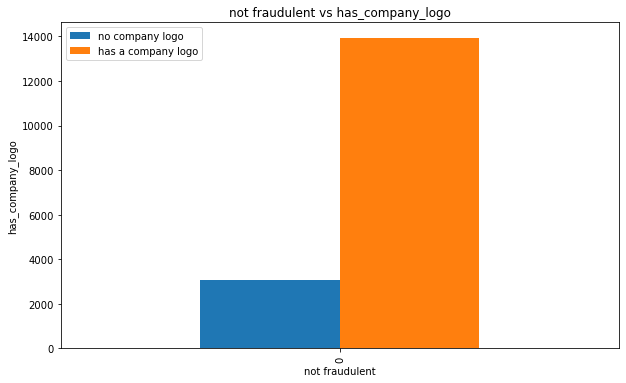

In [23]:
print(pd.crosstab(df.has_company_logo,df.fraudulent))
pd.crosstab(df.fraudulent[df.fraudulent == 0],df.has_company_logo).plot(kind='bar',figsize=(10,6))
plt.title('not fraudulent vs has_company_logo')
plt.xlabel('not fraudulent')
plt.ylabel('has_company_logo')
plt.legend(['no company logo','has a company logo'])
plt.show()

In [24]:

print(df.isna().sum())
df.drop(['department','salary_range','benefits','required_experience','required_education','function'],axis=1,inplace=True)
print(df.columns)

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64
Index(['job_id', 'title', 'location', 'company_profile', 'description',
       'requirements', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'industry', 'fraudulent'],
      dtype='object')


In [25]:
def Labelencoder_feature(a):
    le=LabelEncoder()
    a=le.fit_transform(a)
    return a
df=df.apply(Labelencoder_feature)
x = df.drop('fraudulent',axis=1)
y = df['fraudulent']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
np.random.seed(31)
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
KNNPred= KNN.predict(x_test)
print(f'KNN Accuracy: {accuracy_score(y_test, KNNPred)}')

KNN Accuracy: 0.9628076062639821


In [28]:
np.random.seed(31)
LR = LogisticRegression(max_iter=1000)
LR.fit(x_train,y_train)
LRPred= LR.predict(x_test)
print(f'LR Accuracy: {accuracy_score(y_test, LRPred)}')

LR Accuracy: 0.9549776286353467


In [29]:
np.random.seed(31)
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train,y_train)
RFCPred= RFC.predict(x_test)

print(f'RFC Accuracy: {accuracy_score(y_test, RFCPred)}')

RFC Accuracy: 0.9862975391498882
